In [1]:
import barwisemusiccompression.scripts.default_path as paths
import barwisemusiccompression.scripts.overall_scripts as scr
import barwisemusiccompression.autosimilarity_segmentation as as_seg
import barwisemusiccompression.data_manipulation as dm
import barwisemusiccompression.ae_utils as ae_utils
import barwisemusiccompression.ae as ae
import barwisemusiccompression.lra as lra
import barwisemusiccompression.barwise_input as bi
from barwisemusiccompression.model.current_plot import *

import math
import numpy as np

In [2]:
feature = "nn_log_mel_grill"
  
subdivision = 96
hop_length = 32
hop_length_seconds = hop_length/44100

#song_name = "The Beatles - Come Together"
#spectrogram, bars, references_segments = scr.load_spec_annot_cometogether(feature, hop_length)
song_name = 1
spectrogram, bars, references_segments = scr.load_spec_annot_song_RWC(song_name, feature, hop_length)

freq_len = spectrogram.shape[0]

barwise_spectrogram = bi.barwise_TF_matrix(spectrogram, bars, hop_length_seconds, subdivision)
barwise_spectrogram_centered = barwise_spectrogram - barwise_spectrogram.mean(axis = 0)

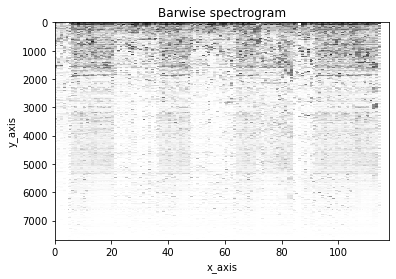

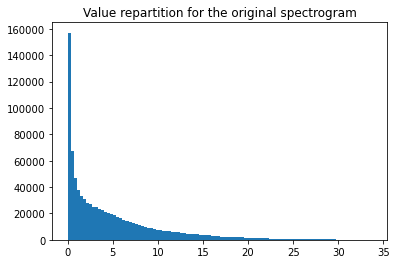

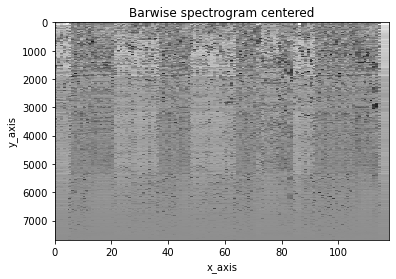

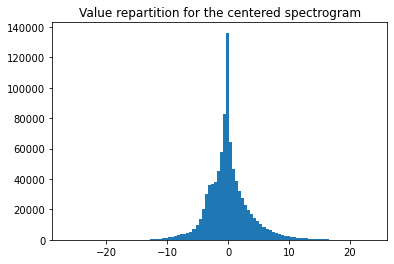

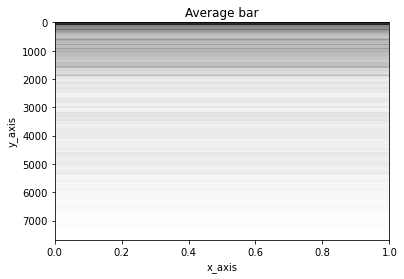

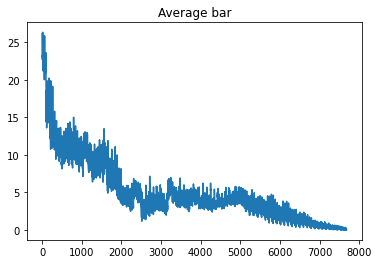

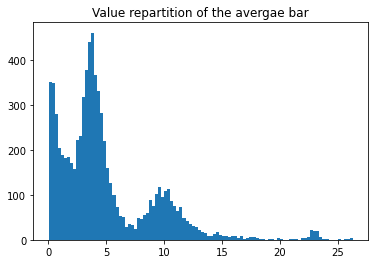

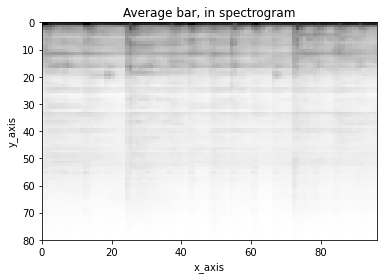

In [3]:
plot_me_this_spectrogram(barwise_spectrogram.T, title = "Barwise spectrogram")
plt.hist(barwise_spectrogram.flatten(), bins = 100)
plt.title("Value repartition for the original spectrogram")
plt.show()
plot_me_this_spectrogram(barwise_spectrogram_centered.T, title = "Barwise spectrogram centered")
plt.hist(barwise_spectrogram_centered.flatten(), bins = 100)
plt.title("Value repartition for the centered spectrogram")
plt.show()
plt.plot()
plot_me_this_spectrogram(barwise_spectrogram.mean(axis = 0).reshape(barwise_spectrogram.shape[1], 1), title = "Average bar")
plt.plot(barwise_spectrogram.mean(axis = 0))
plt.title("Average bar")
plt.show()
plt.hist(barwise_spectrogram.mean(axis = 0), bins = 100)
plt.title("Value repartition of the avergae bar")
plt.show()

avg_spec = bi.vector_to_matrix(barwise_spectrogram.mean(axis = 0), 80, 96)
plot_me_this_spectrogram(avg_spec, title = "Average bar, in spectrogram")

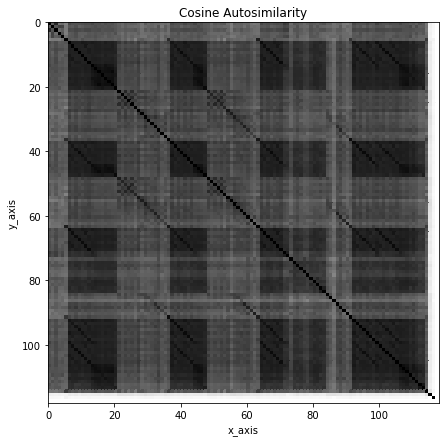

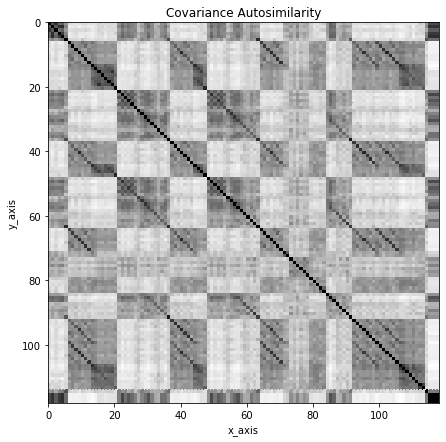

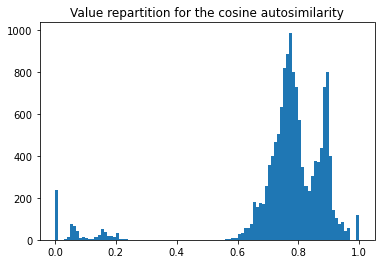

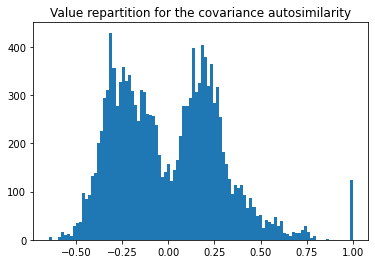

In [4]:
cosine_as = as_seg.get_cosine_autosimilarity(barwise_spectrogram, normalise = True)
plot_me_this_spectrogram(cosine_as, title = "Cosine Autosimilarity")
covariance_as = as_seg.get_covariance_autosimilarity(barwise_spectrogram, normalise = True)
plot_me_this_spectrogram(covariance_as, title = "Covariance Autosimilarity")

plt.hist(cosine_as.flatten(), bins = 100)
plt.title("Value repartition for the cosine autosimilarity")
plt.show()

plt.hist(covariance_as.flatten(), bins = 100)
plt.title("Value repartition for the covariance autosimilarity")
plt.show()

# PCA

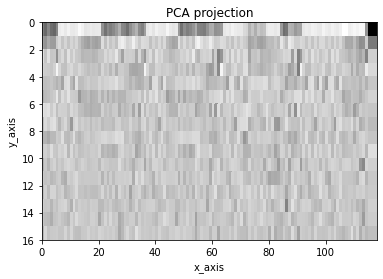

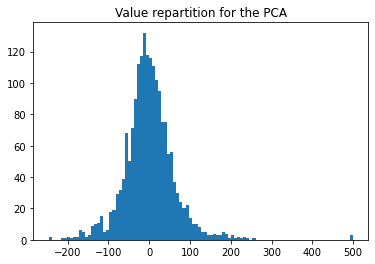

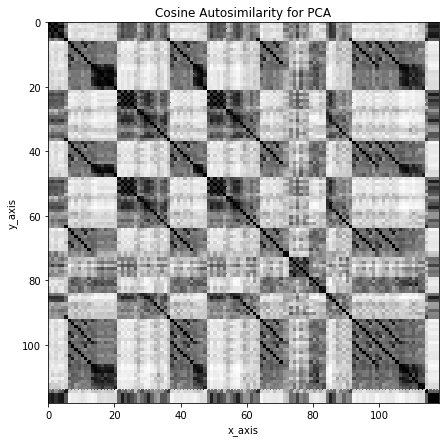

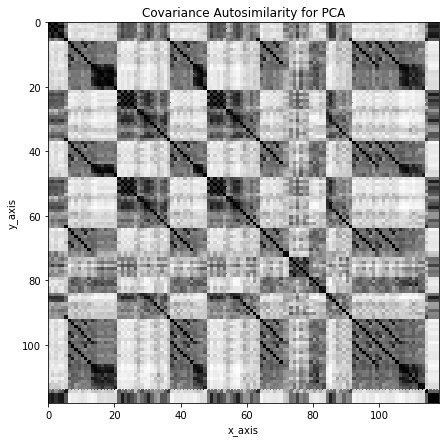

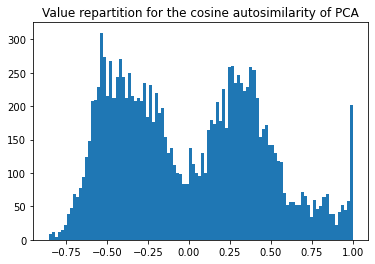

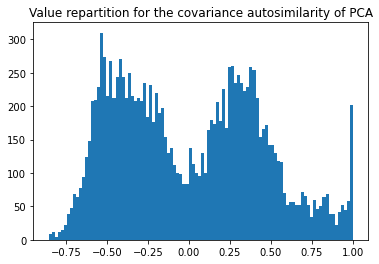

In [5]:
proj_pca = lra.pca_projection(barwise_spectrogram, compression_dimension=16)
plot_me_this_spectrogram(proj_pca.T, title = "PCA projection")
plt.hist(proj_pca.flatten(), bins = 100)
plt.title("Value repartition for the PCA")
plt.show()

cosine_as_pca = as_seg.get_cosine_autosimilarity(proj_pca, normalise = True)
plot_me_this_spectrogram(cosine_as_pca, title = "Cosine Autosimilarity for PCA")
covariance_as_pca = as_seg.get_covariance_autosimilarity(proj_pca, normalise = True)
plot_me_this_spectrogram(covariance_as_pca, title = "Covariance Autosimilarity for PCA")

plt.hist(cosine_as_pca.flatten(), bins = 100)
plt.title("Value repartition for the cosine autosimilarity of PCA")
plt.show()

plt.hist(covariance_as_pca.flatten(), bins = 100)
plt.title("Value repartition for the covariance autosimilarity of PCA")
plt.show()

# NMF

In [6]:
proj_nmf = lra.nmf_projection(barwise_spectrogram, compression_dimension=16)

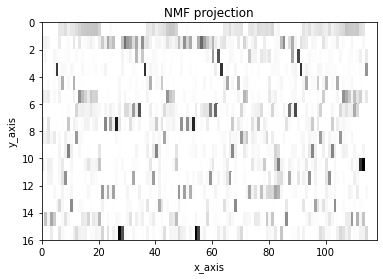

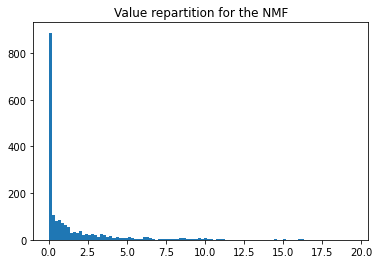

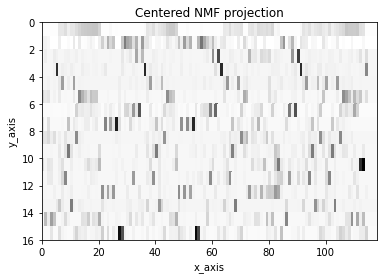

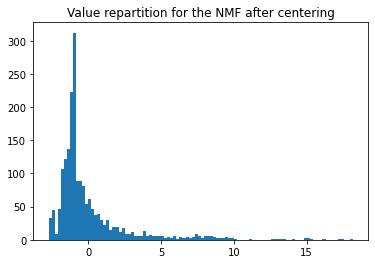

In [7]:
plot_me_this_spectrogram(proj_nmf.T, title = "NMF projection")
plt.hist(proj_nmf.flatten(), bins = 100)
plt.title("Value repartition for the NMF")
plt.show()
proj_nmf_centered = proj_nmf - proj_nmf.mean(axis = 0)
plot_me_this_spectrogram(proj_nmf_centered.T, title = "Centered NMF projection")
plt.hist(proj_nmf_centered.flatten(), bins = 100)
plt.title("Value repartition for the NMF after centering")
plt.show()

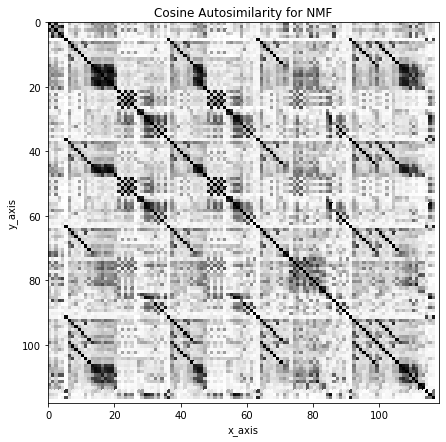

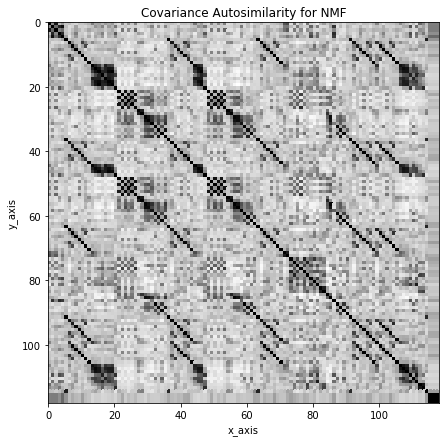

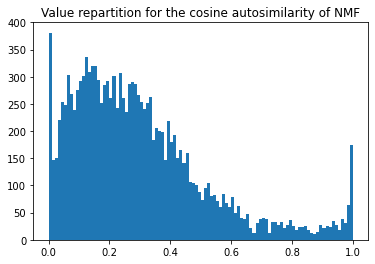

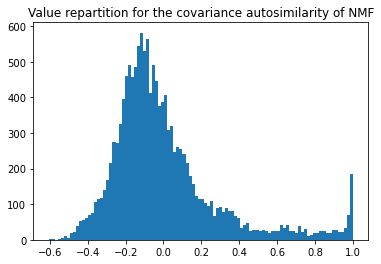

In [8]:
cosine_as_nmf = as_seg.get_cosine_autosimilarity(proj_nmf, normalise = True)
plot_me_this_spectrogram(cosine_as_nmf, title = "Cosine Autosimilarity for NMF")
covariance_as_nmf = as_seg.get_covariance_autosimilarity(proj_nmf, normalise = True)
plot_me_this_spectrogram(covariance_as_nmf, title = "Covariance Autosimilarity for NMF")

plt.hist(cosine_as_nmf.flatten(), bins = 100)
plt.title("Value repartition for the cosine autosimilarity of NMF")
plt.show()

plt.hist(covariance_as_nmf.flatten(), bins = 100)
plt.title("Value repartition for the covariance autosimilarity of NMF")
plt.show()

# AE

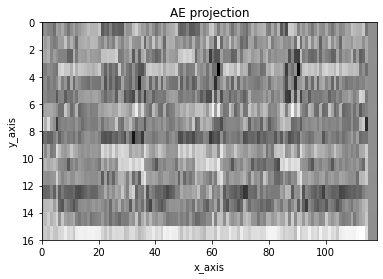

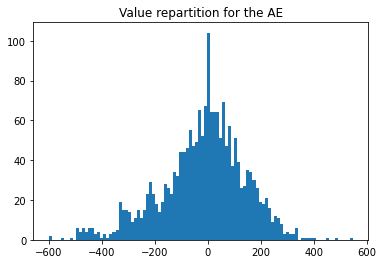

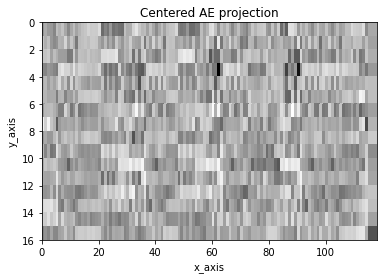

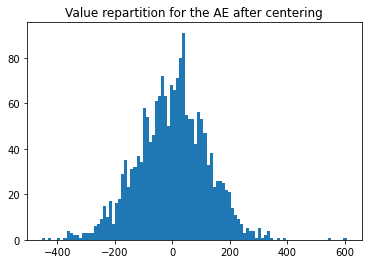

In [9]:
projection_conv = scr.load_or_save_convolutional_projection(paths.path_data_persisted_rwc, song_name, None, 16, lr = 1e-3, n_epochs = 1000, feature = feature, hop_length = 32, subdivision_bars = 96, freq_len = 12, compute_if_not_persisted = False)
plot_me_this_spectrogram(projection_conv.T, title = "AE projection")
plt.hist(projection_conv.flatten(), bins = 100)
plt.title("Value repartition for the AE")
plt.show()
projection_conv_centered = projection_conv - projection_conv.mean(axis = 0)
plot_me_this_spectrogram(projection_conv_centered.T, title = "Centered AE projection")
plt.hist(projection_conv_centered.flatten(), bins = 100)
plt.title("Value repartition for the AE after centering")
plt.show()

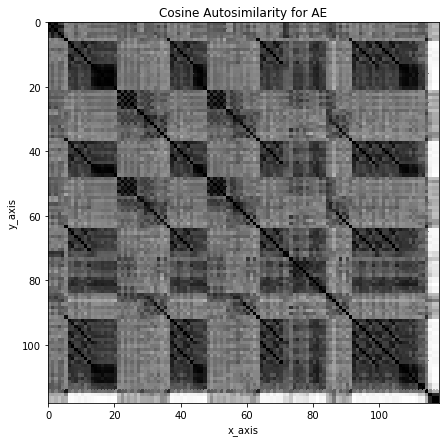

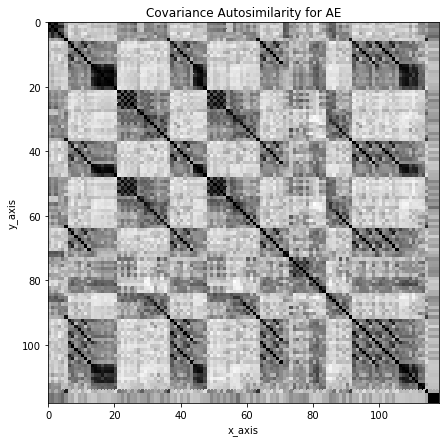

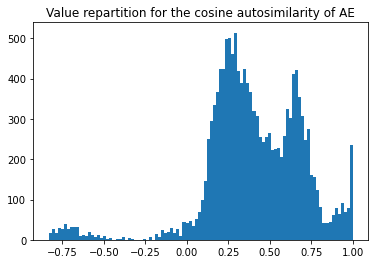

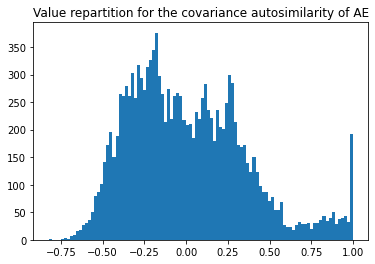

In [10]:
cosine_as_conv = as_seg.get_cosine_autosimilarity(projection_conv, normalise = True)
plot_me_this_spectrogram(cosine_as_conv, title = "Cosine Autosimilarity for AE")
covariance_as_conv = as_seg.get_covariance_autosimilarity(projection_conv, normalise = True)
plot_me_this_spectrogram(covariance_as_conv, title = "Covariance Autosimilarity for AE")

plt.hist(cosine_as_conv.flatten(), bins = 100)
plt.title("Value repartition for the cosine autosimilarity of AE")
plt.show()

plt.hist(covariance_as_conv.flatten(), bins = 100)
plt.title("Value repartition for the covariance autosimilarity of AE")
plt.show()